In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:

URL_CONTAXIOS = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
contaxios=pd.read_csv(URL_CONTAXIOS,keep_default_na=False)
_,colHoxe=contaxios.shape
hoxe=contaxios.columns[colHoxe-1]
contaxios=contaxios.groupby('Country/Region').sum().reset_index()
contaxios.rename(columns={'Country/Region':'País'},inplace=True)
nomePaises=list(contaxios['País'])
contaxios.drop(['Lat','Long'],1,inplace=True)
contaxios.reset_index()
contaxios

,País,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142
1,Albania,0,0,0,0,0,0,0,0,0,...,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341
2,Algeria,0,0,0,0,0,0,0,0,0,...,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484
3,Andorra,0,0,0,0,0,0,0,0,0,...,765,844,851,852,852,852,852,852,852,852
4,Angola,0,0,0,0,0,0,0,0,0,...,86,86,86,86,86,88,91,92,96,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,449,451,457,464,464,464,472,473,481,485
184,Western Sahara,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
185,Yemen,0,0,0,0,0,0,0,0,0,...,354,399,419,453,469,482,484,496,524,560
186,Zambia,0,0,0,0,0,0,0,0,0,...,1089,1089,1089,1089,1089,1089,1089,1200,1200,1200


### construcción contaxios diarios


In [4]:
listaCols=list(contaxios.columns)
listaCols=[x for x in listaCols if listaCols.index(x)>0]
for col in listaCols:
    if col!=listaCols[0]:
        contaxios[col+"_"]=contaxios[col]-contaxios[aux]
        contaxios.drop([aux],1,inplace=True)
    aux=col
contaxios.drop([aux],1,inplace=True)    
listaCols=list(contaxios.columns)
listaCols=[x for x in listaCols if listaCols.index(x)>0]
for col in listaCols:
    contaxios.rename(columns={col:col[:len(col)-1]},inplace=True)
contaxiosDiarios=contaxios.copy()
contaxiosDiarios


,País,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,545,759,758,787,915,582,791,575,542,683
1,Albania,0,0,0,0,0,0,0,0,0,...,6,21,20,13,15,20,14,17,36,42
2,Algeria,0,0,0,0,0,0,0,0,0,...,119,113,107,98,104,115,104,111,117,102
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,79,7,1,0,0,0,0,0,0
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,3,1,4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,1,2,6,7,0,0,8,1,8,4
184,Western Sahara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185,Yemen,0,0,0,0,0,0,0,0,0,...,31,45,20,34,16,13,2,12,28,36
186,Zambia,0,0,0,0,0,0,0,0,0,...,32,0,0,0,0,0,0,111,0,0


### Media móbil N días


In [5]:
N=7
listaCols=list(contaxios.columns)
listaCols=[x for x in listaCols if listaCols.index(x)>0]
for col in listaCols:
    if listaCols.index(col)>N-1:
        contaxios[col+"_"]=0
        for j in range(N):
            contaxios[col+"_"] = contaxios[col+"_"]+contaxios[listaCols[listaCols.index(col)-j]]
        contaxios[col+"_"]=contaxios[col+"_"]/N
contaxios

,País,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/1/20_,6/2/20_,6/3/20_,6/4/20_,6/5/20_,6/6/20_,6/7/20_,6/8/20_,6/9/20_,6/10/20_
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,653.857143,668.285714,687.285714,716.857143,758.571429,718.000000,733.857143,738.142857,707.142857,696.428571
1,Albania,0,0,0,0,0,0,0,0,0,...,19.857143,19.285714,19.142857,17.285714,16.142857,15.714286,15.571429,17.142857,19.285714,22.428571
2,Algeria,0,0,0,0,0,0,0,0,0,...,144.285714,132.714286,125.142857,119.142857,114.428571,111.857143,108.571429,107.428571,108.000000,107.285714
3,Andorra,0,0,0,0,0,0,0,0,0,...,0.285714,11.571429,12.571429,12.714286,12.571429,12.571429,12.571429,12.428571,1.142857,0.142857
4,Angola,0,0,0,0,0,0,0,0,0,...,2.285714,2.285714,2.142857,1.714286,0.714286,0.571429,0.714286,0.857143,1.428571,3.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,3.714286,3.142857,3.285714,2.571429,2.571429,2.428571,3.428571,3.428571,4.285714,4.000000
184,Western Sahara,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
185,Yemen,0,0,0,0,0,0,0,0,0,...,17.285714,21.428571,23.285714,25.000000,26.571429,24.571429,23.000000,20.285714,17.857143,20.142857
186,Zambia,0,0,0,0,0,0,0,0,0,...,24.142857,24.142857,4.571429,4.571429,4.571429,4.571429,4.571429,15.857143,15.857143,15.857143


In [6]:
listaCols=list(contaxios.columns)
listaCols=[x for x in listaCols if listaCols.index(x)>0]
for col in listaCols:
    if ((col.find("_")==-1)):
        contaxios.drop([col],1,inplace=True)
    else:
        contaxios.rename(columns={col:col[:len(col)-1]},inplace=True)
contaxios #Media Móbil en N días

,País,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,...,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,653.857143,668.285714,687.285714,716.857143,758.571429,718.000000,733.857143,738.142857,707.142857,696.428571
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.857143,19.285714,19.142857,17.285714,16.142857,15.714286,15.571429,17.142857,19.285714,22.428571
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,144.285714,132.714286,125.142857,119.142857,114.428571,111.857143,108.571429,107.428571,108.000000,107.285714
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.285714,11.571429,12.571429,12.714286,12.571429,12.571429,12.571429,12.428571,1.142857,0.142857
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.285714,2.285714,2.142857,1.714286,0.714286,0.571429,0.714286,0.857143,1.428571,3.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.714286,3.142857,3.285714,2.571429,2.571429,2.428571,3.428571,3.428571,4.285714,4.000000
184,Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
185,Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.285714,21.428571,23.285714,25.000000,26.571429,24.571429,23.000000,20.285714,17.857143,20.142857
186,Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.142857,24.142857,4.571429,4.571429,4.571429,4.571429,4.571429,15.857143,15.857143,15.857143


### Debuxamos a serie dun país

In [13]:
pais=contaxios.melt(id_vars='País',var_name='Día',value_name='Valor')
paisD=contaxiosDiarios.melt(id_vars='País',var_name='Día',value_name='Valor')
nomePais="Spain"
pais1=pais.loc[pais['País']==nomePais]
pais1D=paisD.loc[paisD['País']==nomePais]

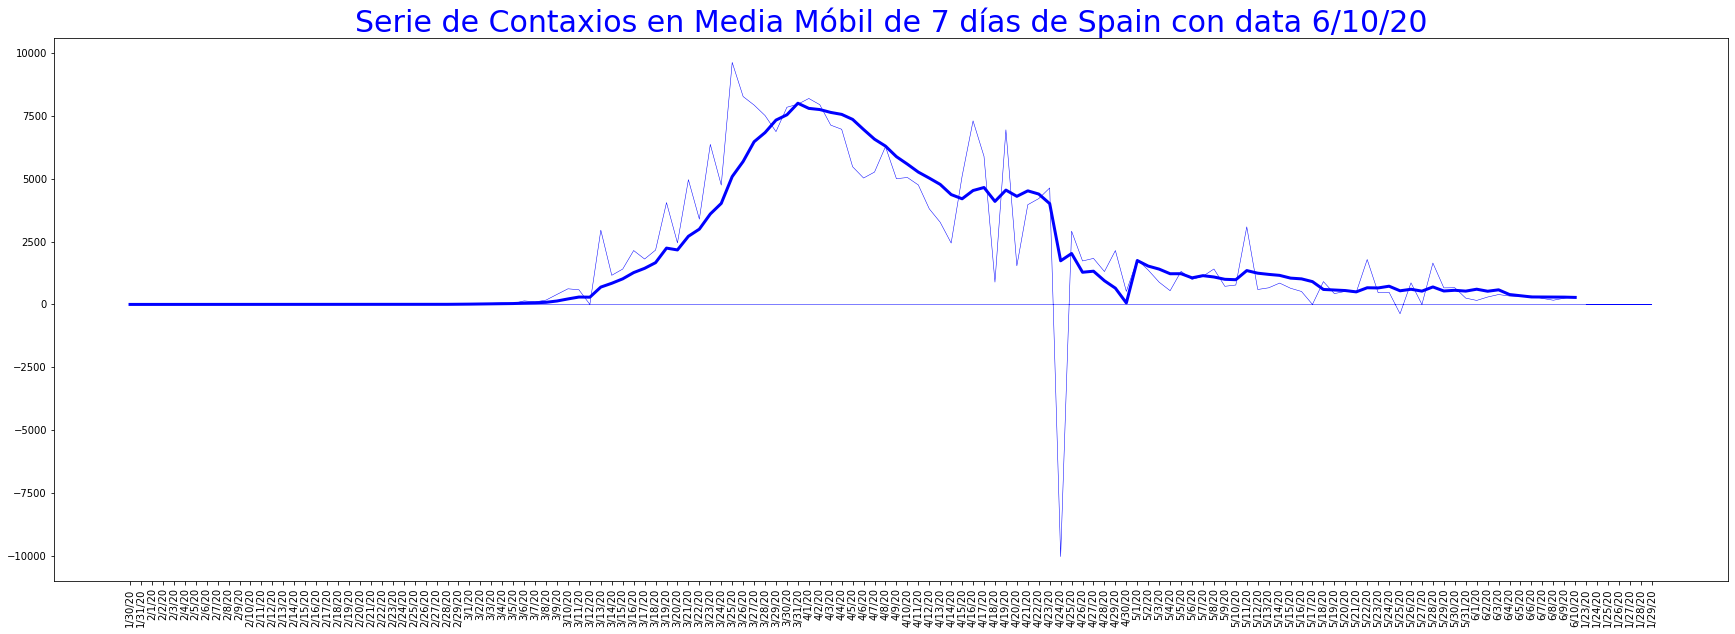

In [14]:
_,ax=plt.subplots(figsize=(30,10))
plt.xticks(rotation=90)
ax.set_title("Serie de Contaxios en Media Móbil de " 
             +str(N)+" días de "+nomePais+" con data "+hoxe,color='blue',size='30')
ax.plot(pais1['Día'],pais1['Valor'],linewidth=3,color='blue')
ax.plot(pais1D['Día'],pais1D['Valor'],linewidth=0.5,color='blue')




### Control de Rebrotes
  #### Hai rebrote con 7 días de súbida, 10 de baixada e 7 de subida (en media móbil)

In [15]:
control=""
rowAntValor=-1
for _,row in pais1.iterrows():
    if (row['Valor']>rowAntValor):
        control=control+"s"
    else:
        control=control+"b"
    rowAntValor=row['Valor']
control

'sbsbbbbbbbsbbbbbbbbbbbbbbbssssssssssssssssbsssssssbsssssssssssbbbbbbbbbbbbbbbssbsbsbbbsbsbbbsbbbsbsbbbsbbbbbbbbbbsbsbsbsbsbsbsbbbbsbb'

### Identificamos rebrotes cando hai unha semana de subidas, unha de baixadas e outra de subidas

In [16]:
pos=control.find("sssssss")
rebrote=False
if pos!=-1:
    control=control[pos:]
    pos=control.find("bbbbbbbbbb")
    if pos!=-1:
        control=control[pos:]
        pos=control.find("sssssss")
        if pos!=-1:
            rebrote=True
rebrote


False

###  Buscamos todos os países con rebrotes

In [17]:
paisesRebrote=[]
for nomePais in nomePaises:
    pais1=pais.loc[pais['País']==nomePais]
    control=""
    rowAntValor=-1
    
    for _,row in pais1.iterrows():
        if (row['Valor']>rowAntValor):
            control=control+"s"
        else:
            control=control+"b"
        rowAntValor=row['Valor']
    
    rebrote=False
    pos=control.find("sssssss")
    if (pos!=-1):
        control=control[pos:]
        pos=control.find("bbbbbbbbbb")
        if (pos!=-1):
            control=control[pos:]
            pos=control.find("sssssss")
            if (pos!=-1):
                control=control[pos:]
                pos=control.find("bbbbbbbbbb")
                if (pos==-1):
                    rebrote=True
    if rebrote==True:
        paisesRebrote.append(nomePais)
#paisesRebrote=[x for x in paisesRebrote if x!="Iran"]
paisesRebrote

['Azerbaijan',
 'Bulgaria',
 'Iran',
 'Israel',
 'Korea, South',
 'Netherlands',
 'Saudi Arabia',
 'Serbia',
 'Uzbekistan']

### Debuxamos as series móbiles en rebrote

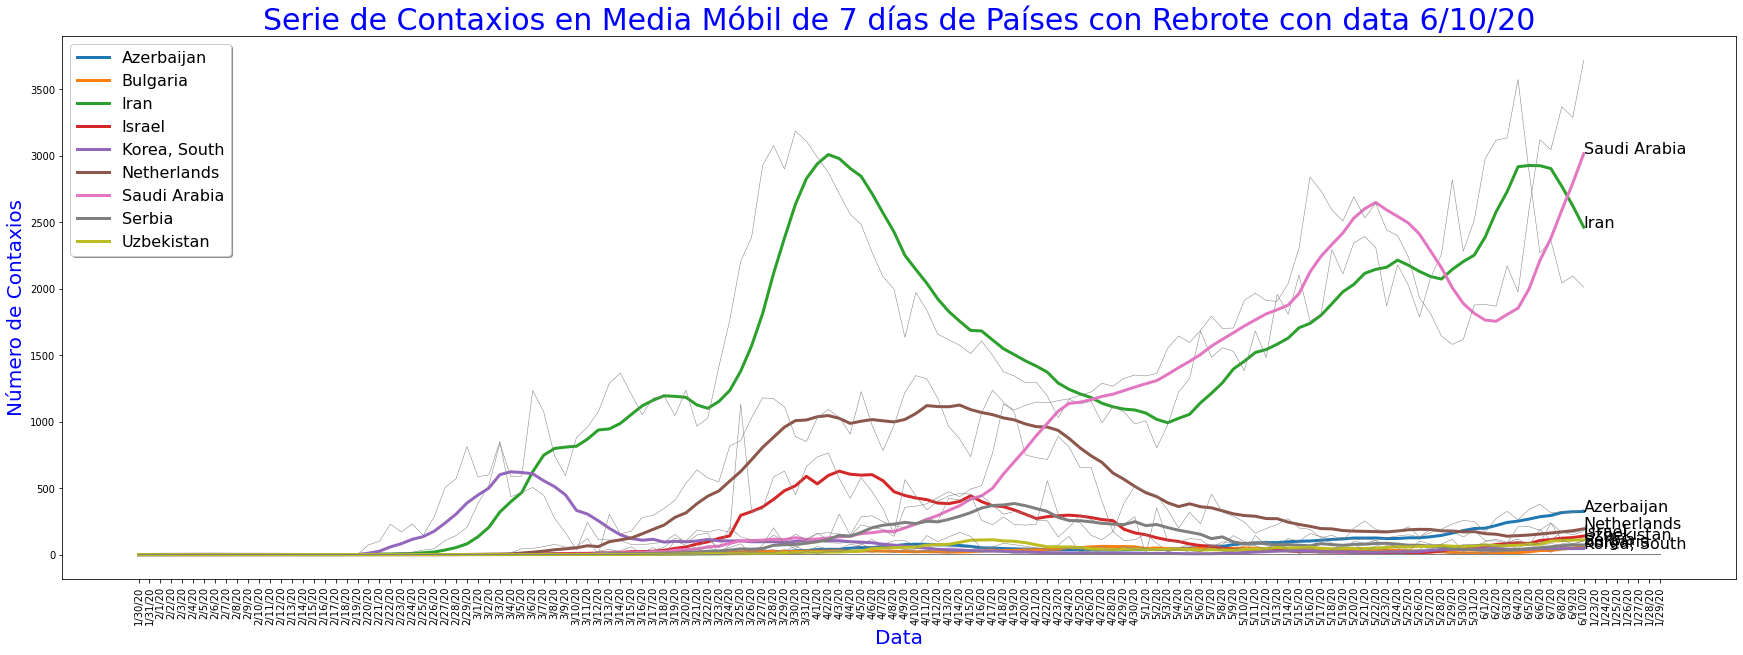

In [12]:
_,ax=plt.subplots(figsize=(30,10))
plt.xticks(rotation=90)
ax.set_title("Serie de Contaxios en Media Móbil de " 
             +str(N)+" días de Países con Rebrote con data "+hoxe,color='blue',size='30')
for nomePais in paisesRebrote:
    paisR=pais.loc[pais['País']==nomePais]
    paisDR=paisD.loc[paisD['País']==nomePais]
    ax.plot(paisR['Día'],paisR['Valor'],label=nomePais,linewidth=3)
    ax.plot(paisDR['Día'],paisDR['Valor'],linewidth=0.5,color='gray')
    ax.annotate(nomePais, (hoxe,paisR.loc[paisR['Día']==hoxe]['Valor'] ),size=16)
ax.set_xlabel("Data",color='blue',size='20')
ax.set_ylabel("Número de Contaxios",color='blue',size='20')
ax.legend(loc='upper left', shadow=True, fontsize=16)



